In [47]:
import sklearn
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
train_or = pd.read_csv('train.csv')
test_or = pd.read_csv('test.csv')

train = train_or.copy()
test = test_or.copy()


Primi 5 valori del dateset:

In [49]:
train.dtypes

Churn                object
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

Elimino la colonna customerID non essendo rilevante per il modello

In [50]:
train.drop(['customerID'], axis=1, inplace=True)
test.drop(['customerID'], axis=1, inplace=True)

Trasformo i dati in interi:

In [51]:
for col in train.columns.values:
    train[col] = LabelEncoder().fit_transform(train[col])
for col in test.columns.values:
    test[col] = LabelEncoder().fit_transform(test[col])

In [52]:
train.dtypes

Churn               int32
gender              int32
SeniorCitizen       int64
Partner             int32
Dependents          int32
tenure              int64
PhoneService        int32
MultipleLines       int32
InternetService     int32
OnlineSecurity      int32
OnlineBackup        int32
DeviceProtection    int32
TechSupport         int32
StreamingTV         int32
StreamingMovies     int32
Contract            int32
PaperlessBilling    int32
PaymentMethod       int32
MonthlyCharges      int64
TotalCharges        int32
dtype: object

Faccio il replace di eventuali valori nulli

In [53]:
train.replace("", np.nan, inplace=True)
train.replace(" ", np.nan, inplace=True)
train.replace("?", np.nan, inplace=True)
test.replace("", np.nan, inplace=True)
test.replace(" ", np.nan, inplace=True)
test.replace("?", np.nan, inplace=True)
train.isna().sum()

Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Primi 5 valori del train prima della trasformazione in interi:

In [54]:
train_or.head()

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,3129-AAQOU,Female,0,Yes,Yes,19,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.60,485.9
1,Yes,9415-DPEWS,Female,0,No,No,18,Yes,Yes,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,88.35,1639.3
2,Yes,2034-CGRHZ,Male,1,No,No,24,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),102.95,2496.7
3,Yes,0407-BDJKB,Male,0,Yes,No,60,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,95.75,5742.9
4,No,5857-TYBCJ,Male,1,Yes,No,44,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,89.20,4040.2


Primi 5 valori del train dopo la trasformazione in interi e la rimozione dell'ID:

In [55]:
train.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,1,1,19,1,2,2,1,1,1,1,1,1,2,0,3,94,2688
1,1,0,0,0,0,18,1,2,1,0,0,0,2,2,0,0,1,2,947,734
2,1,1,1,0,0,24,1,2,1,0,2,2,0,2,2,0,1,1,1198,1393
3,1,1,0,1,0,60,1,2,1,0,2,2,0,2,0,0,1,2,1081,3106
4,0,1,1,1,0,44,1,2,1,0,0,2,0,2,0,0,1,2,963,2262


Numero righe e colonne e suddivisione dei valori di Churn:

In [56]:
print(f"Numero di righe (utenti telefonici): {train_or.shape[0]}")
print(f"Numero di colonne(features): {train_or.shape[1]}")
print(train_or['Churn'].value_counts())


Numero di righe (utenti telefonici): 4507
Numero di colonne(features): 21
No     3300
Yes    1207
Name: Churn, dtype: int64


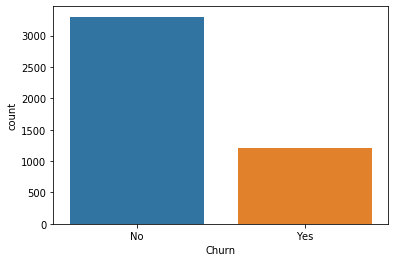

In [57]:
sns.countplot("Churn", data=train_or);

Tutte le features del dataset: 

In [58]:
train.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

Grafici dei valori all'interno del train originale:

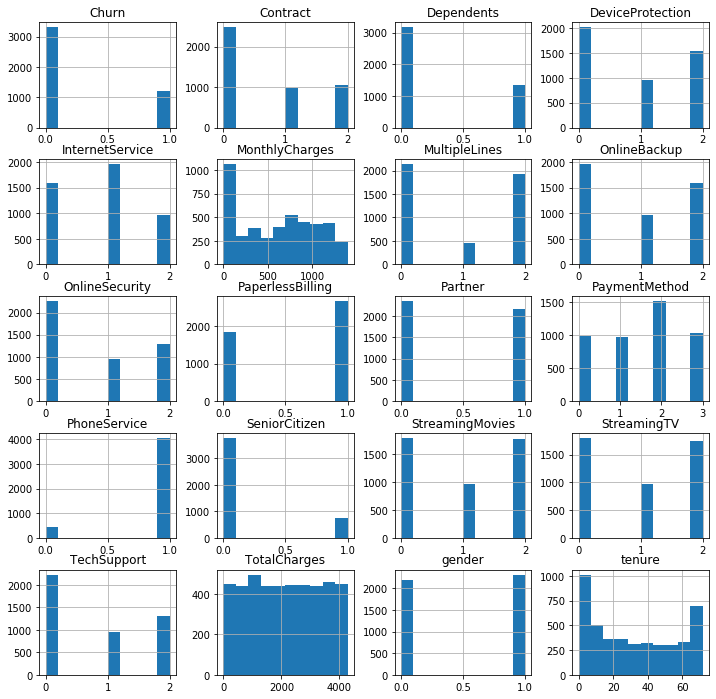

In [59]:
train.hist(figsize=(12,12));

Controllo, servendomi di alcuni grafici, come alcune features sono distribuite tra i due valori di Churn (anche in percentuale):

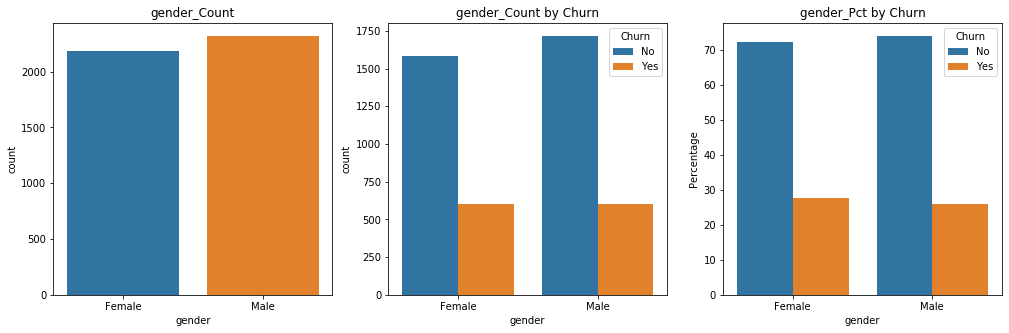

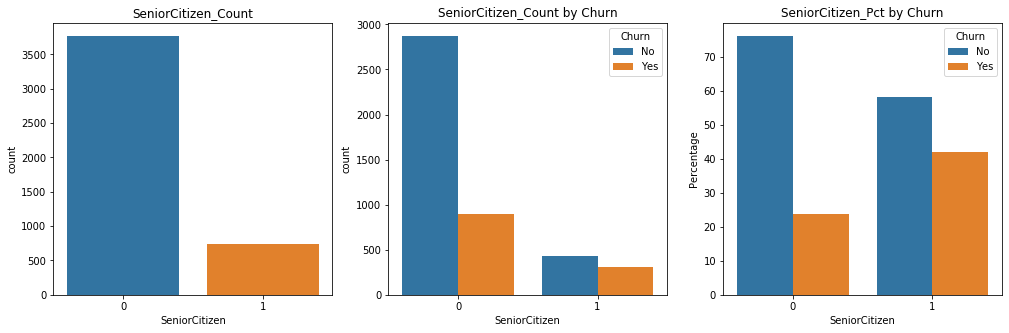

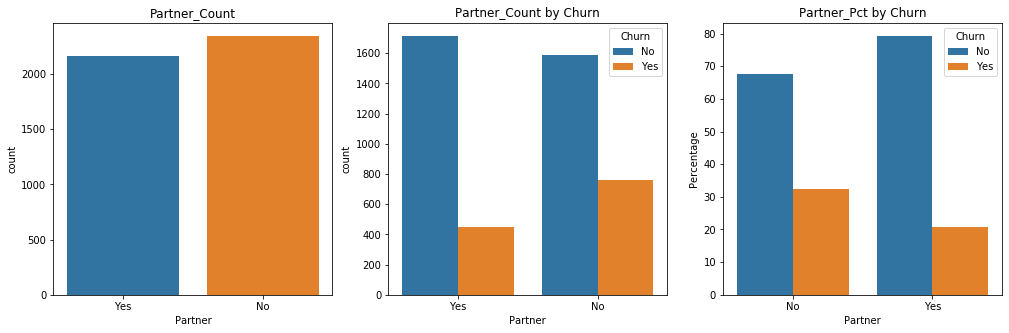

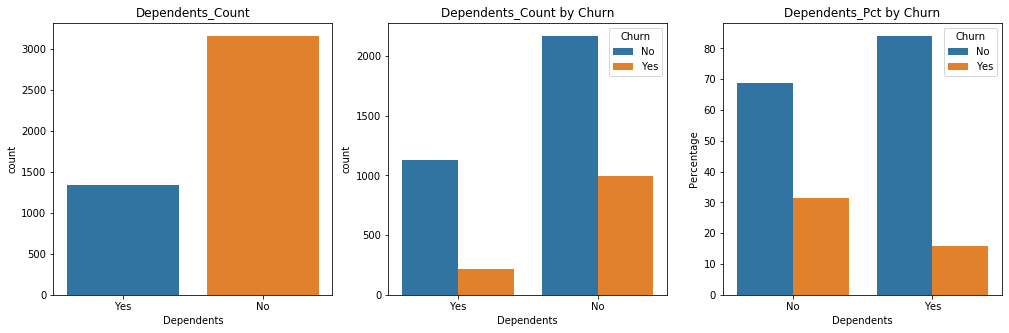

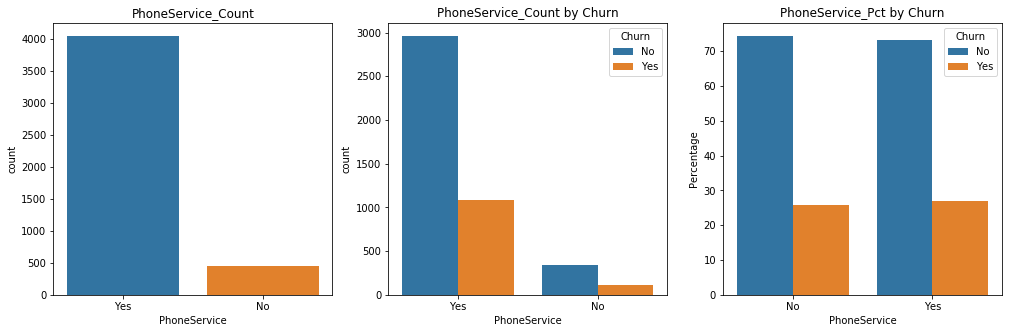

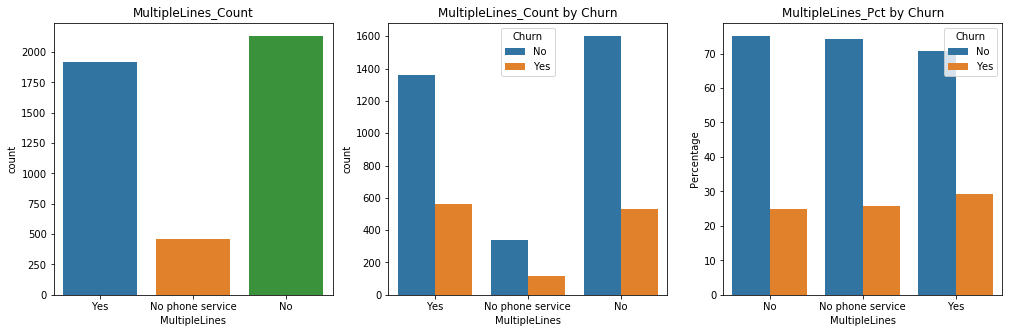

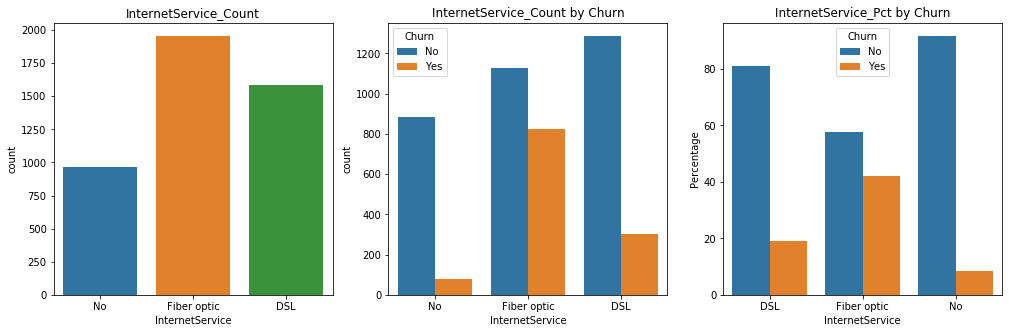

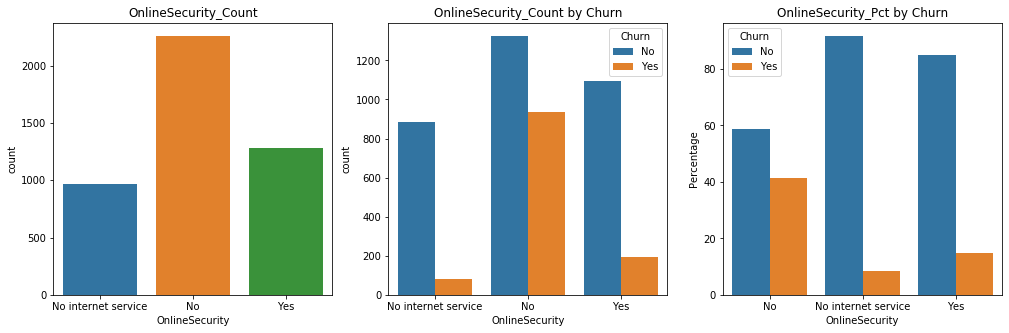

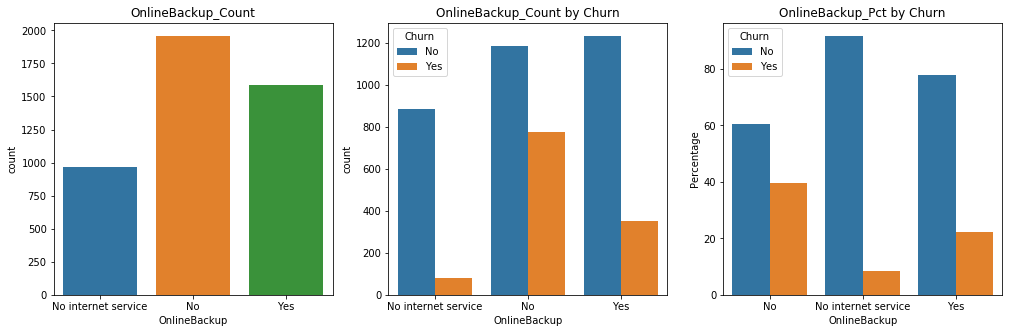

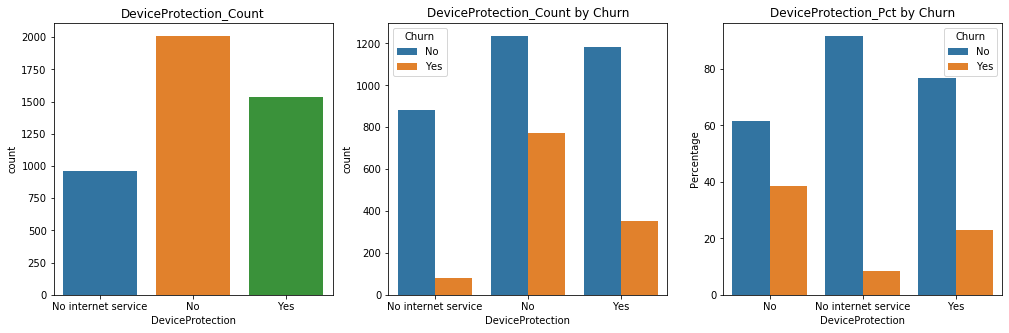

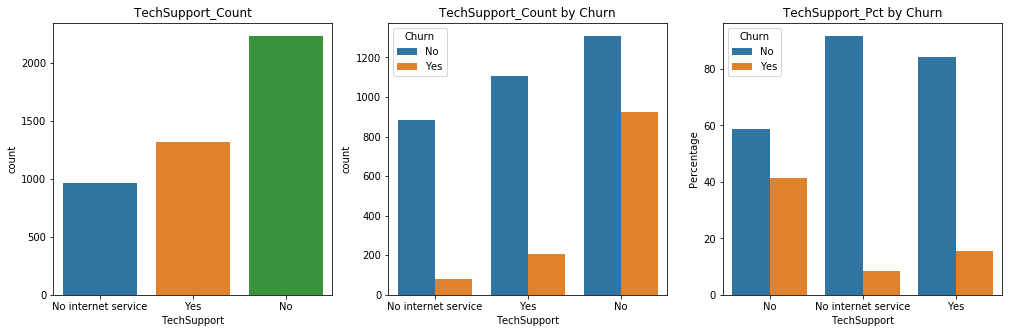

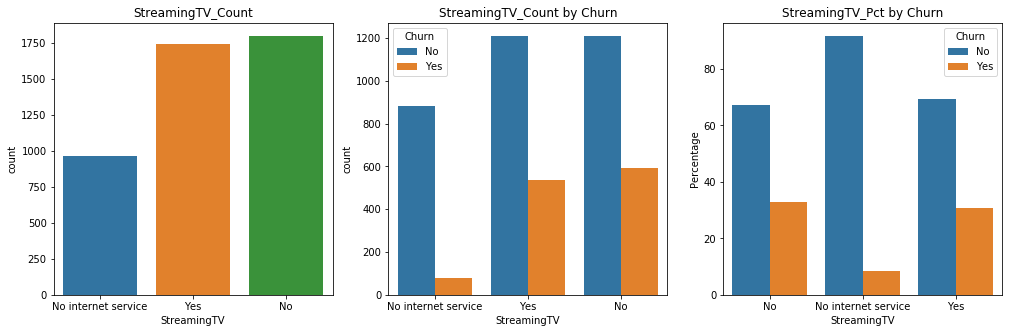

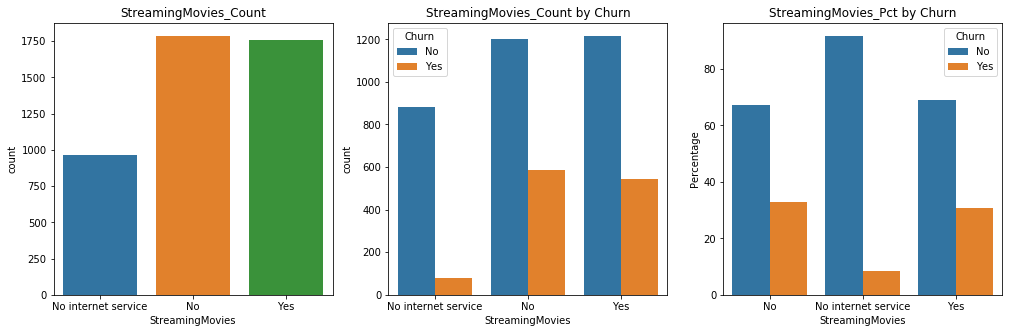

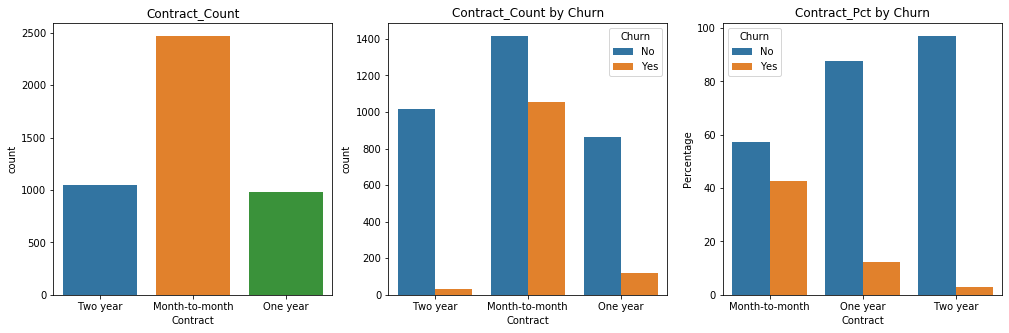

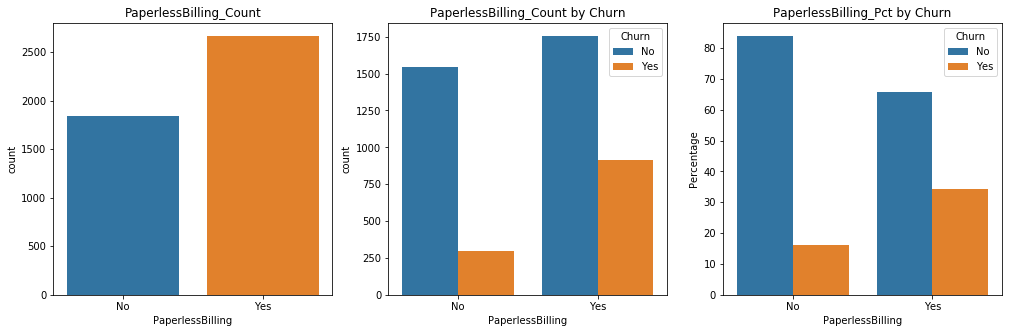

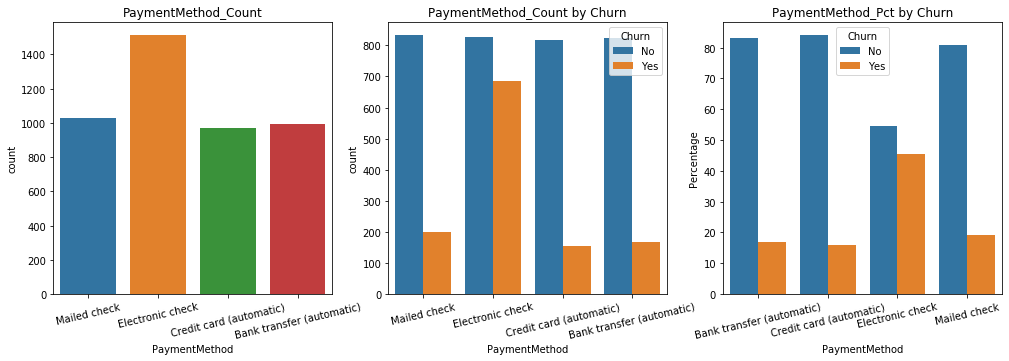

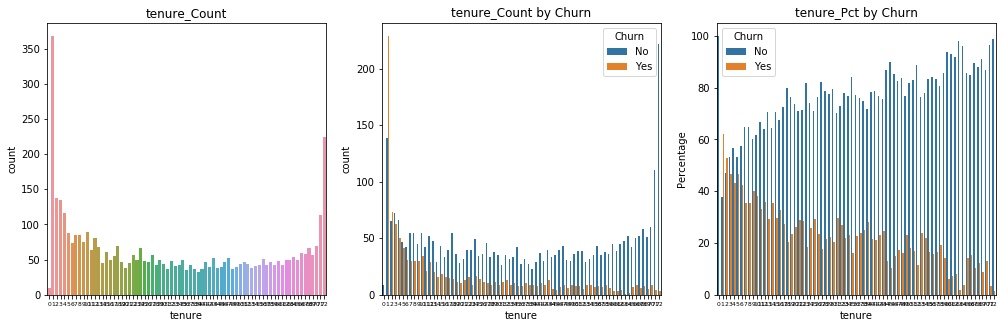

In [60]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'tenure']
for col in cols:
    fig, ax=plt.subplots(1,3,figsize=(17,5))
    data1=(train_or.groupby(col)["Churn"].value_counts(normalize=True)*100).rename("Percentage").reset_index()
    sns.countplot(ax=ax[0],x=col, data=train_or)
    ax[0].set_title(col+"_Count")
    sns.countplot(ax=ax[1],x=col, data=train_or, hue="Churn")
    ax[1].set_title(col+"_Count by Churn")
    sns.barplot(ax=ax[2],x=col, y="Percentage", data=data1, hue="Churn")
    ax[2].set_title(col+"_Pct by Churn")  
    if col =="PaymentMethod":
        for i in range(3):
            ax[i].tick_params(axis="x",labelrotation=13)
    elif col =="tenure":
        for i in range(3):
            ax[i].tick_params(axis="x",labelsize=6)

dai grafici precedenti possiamo notare ome alcune features non influenzano particolarmente il valore di Churn e per questo verranno scartate (es.MultipleLines, PhoneService e Gender)

Dalla seguente tabella (guardando la prima colonna) abbiamo la conferma della bassa correlazione tra Churn e le features appena scartate

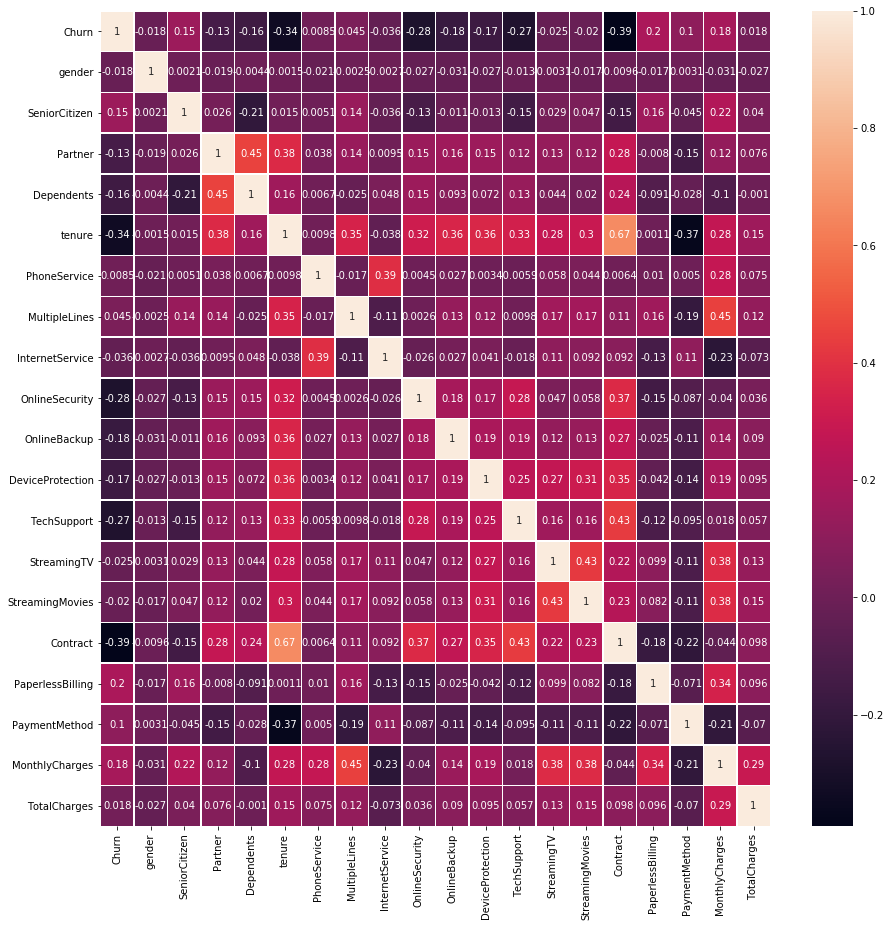

In [61]:
corr = train.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, linewidths=.5, ax=ax)

Notiamo che ci sono anche altre features con bassa correlazione (prossima allo 0) che possiamo rimuovere:  StreamingTV, StreamingMovies, TotalCharges e InternetService

In [62]:
features = ['SeniorCitizen', 'Dependents', 'tenure', 'Partner',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']

X=train[features]
Y=train['Churn']
X_test=test[features]
Y_test=test['Churn']

Specifico il modello:

In [63]:
model = RandomForestClassifier(random_state = 50) 
# RandomForest è un algoritmo che (a differenza del DecisionTree) genera molteplici alberi. 
# Ogni albero classifica un oggetto basandosi sui suoi attributi ed esprimerà quindi un voto per quella classe. 
# Nel caso del RandomForestClassifier si prenderà quindi in considerazione la classificazione che ha ricevuto più voti fra tutti gli altri alberi nella foresta.

# Fit del modello
model.fit(X, Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [64]:
train_predictions = model.predict(X)
train_acc=metrics.accuracy_score(Y,train_predictions)
print('Accuratezza train: %s'  % train_acc)

test_predictions = model.predict(X_test)
test_acc=metrics.accuracy_score(Y_test,test_predictions)
print('Accuratezza test: %s'  % test_acc)

Accuratezza train: 0.9977812291990238
Accuratezza test: 0.7843833185448092


Stampo l'accuratezza del test in percenuale:

In [65]:
print('%.3f%%' % float(test_acc*100))

78.438%
